In [1]:
import pandas as pd

# Load the Netflix dataset
data = pd.read_csv(r'C:\Users\opetk\Desktop\netflix_titles.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_summary


,Missing Values,Percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [4]:
data['duration_cleaned'] = data['duration'].str.extract('(\d+)').astype(float)
data['country'].fillna('Unknown', inplace=True)
data['rating'].fillna('Not Rated', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data.isnull().sum()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\opetk\AppData\Local\Temp\ipykernel_24156\3260726265.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['duration_cleaned'] = data['duration'].str.extract('(\d+)').astype(float)
C:\Users\opetk\AppData\Local\Temp\ipykernel_24156\3260726265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('Unknown', inplace=True)
C:\Users\opetk\AppData\Local\Temp\ipykernel_24156\3260726265.py:3: FutureWarnin

show_id                0
type                   0
title                  0
director            2634
cast                 825
country                0
date_added             0
release_year           0
rating                 0
duration               3
listed_in              0
description            0
duration_cleaned       3
dtype: int64

In [7]:
import matplotlib.pyplot as plt

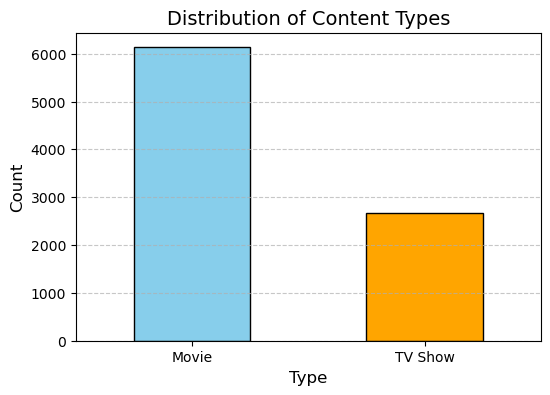

In [8]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('Distribution of Content Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

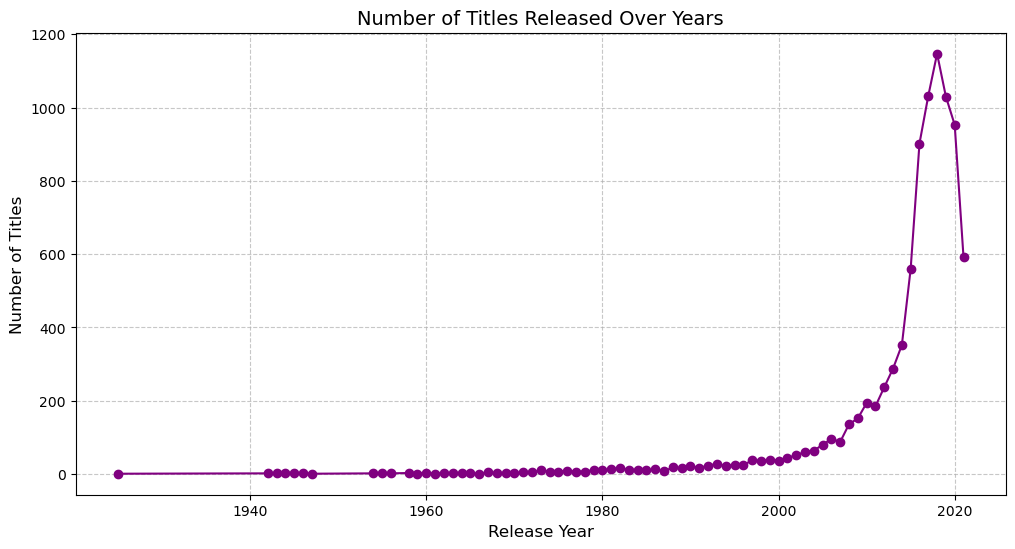

In [9]:
release_year_counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', marker='o', color='purple')
plt.title('Number of Titles Released Over Years', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

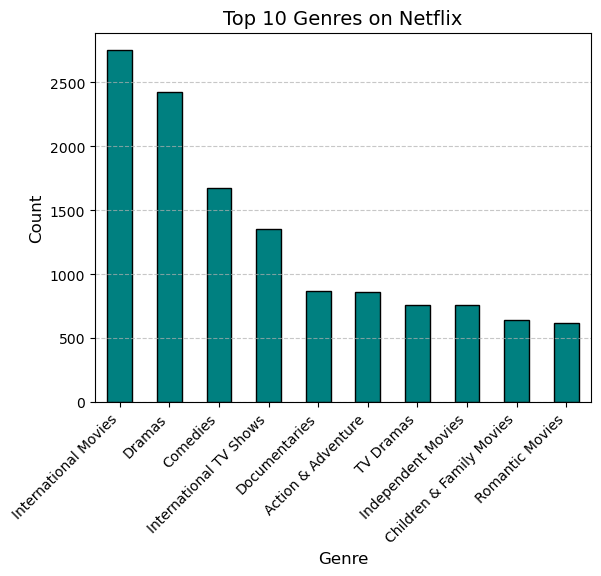

In [10]:
from collections import Counter
genre_list = data['listed_in'].str.split(',').sum()
genre_counts = Counter([genre.strip() for genre in genre_list])
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(10, 6))
genre_counts_df.head(10).plot(kind='bar', x='Genre', y='Count', color='teal', legend=False, edgecolor='black')
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

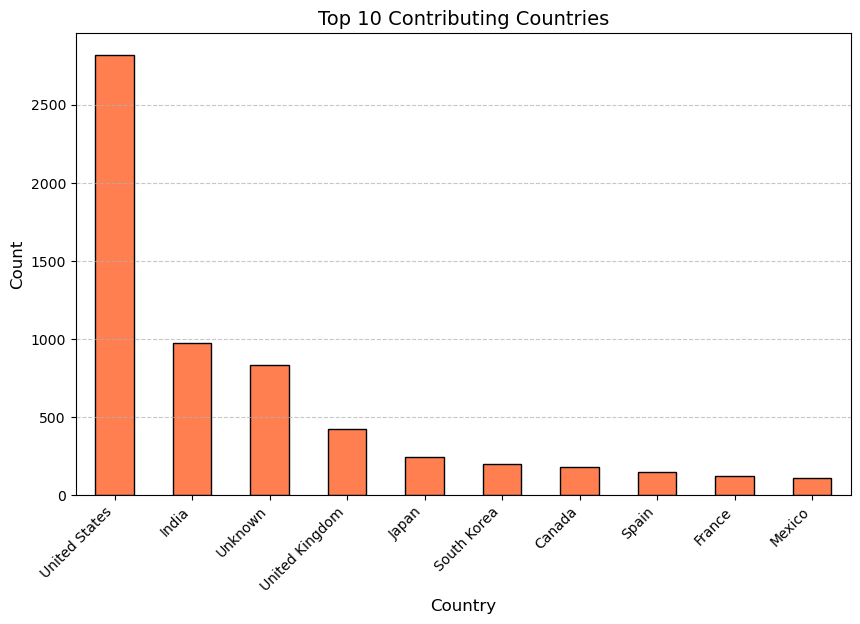

In [11]:
country_counts = data['country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.head(10).plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 10 Contributing Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


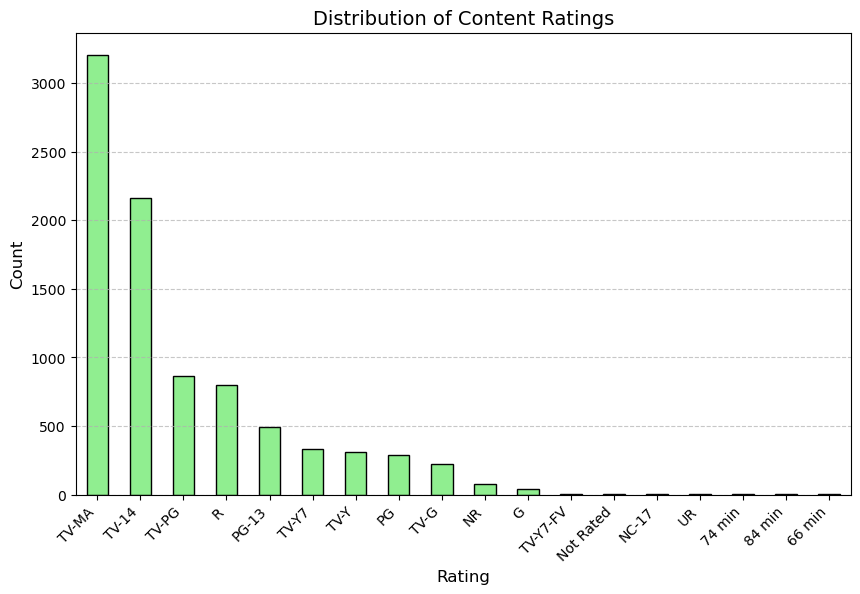

In [12]:
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Content Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


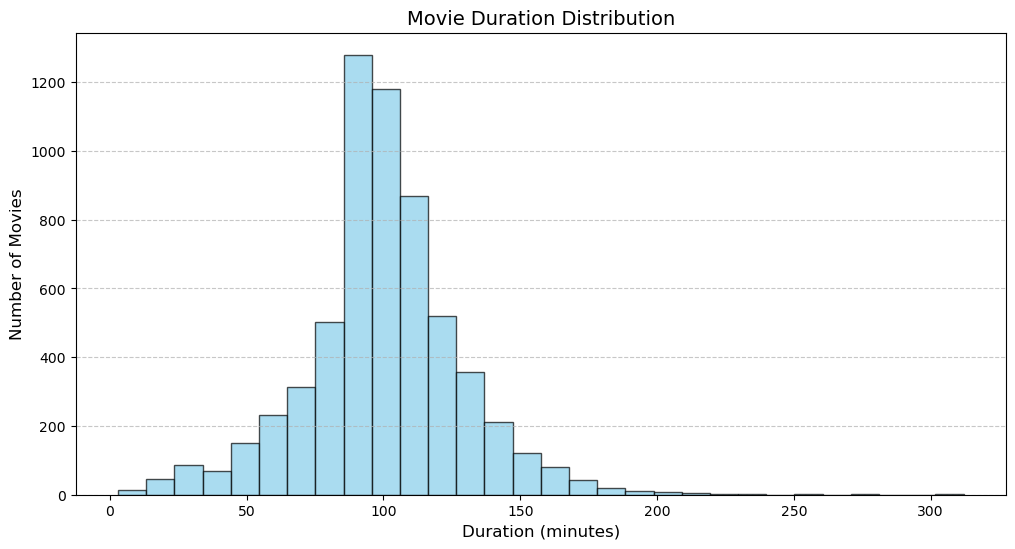

In [13]:
movie_durations = data[data['type'] == 'Movie']['duration_cleaned']
tv_show_seasons = data[data['type'] == 'TV Show']['duration_cleaned']
plt.figure(figsize=(12, 6))
plt.hist(movie_durations, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Movie Duration Distribution', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

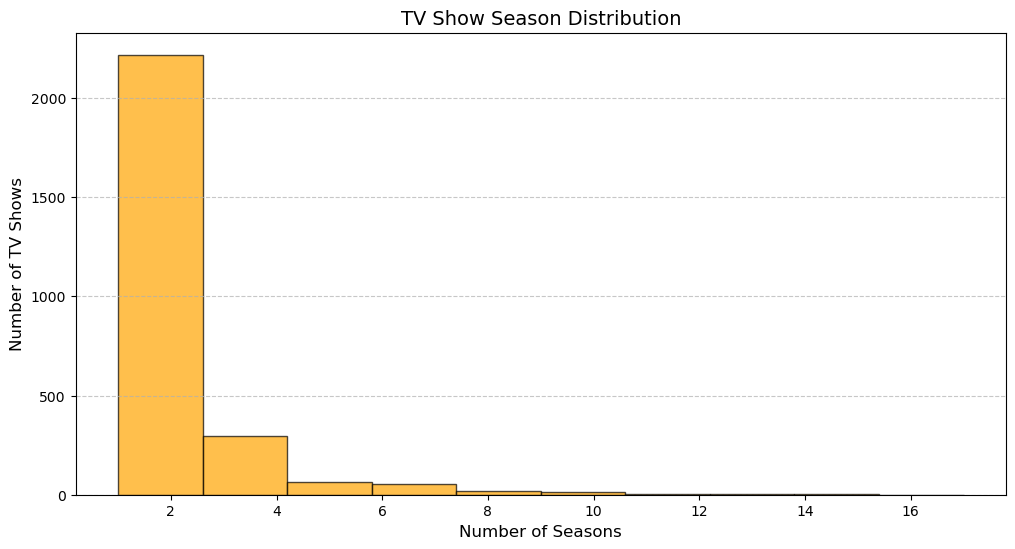

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(tv_show_seasons, bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('TV Show Season Distribution', fontsize=14)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()